In [16]:
%matplotlib inline
from skimage import io, color, external, filters
import numpy

# Dithering en image avec Python

Dans ce projet, nous nous basons sur des méthodes utilisées pour le dithering en traitement d'image [comme dans cette méthode](http://michal.is/projects/image-dithering-in-matlab/). Ces méthodes fonctionnant sous Matlab, nous avons donc entrepris leur analyse et leur réécriture en méthodes Python.

## Outils

Pour le traitement d'image, nous utilisons principalement des outils SciPy comme NumPy ou Matplotlib, qui est utilisé pour l'affichage des images. Nous utilisons également skimage qui permet d'accéder à des méthodes notamment de conversion de couleur (grayscale) et du thresholding.

## Seuillage

Dans cette première partie, on expose deux méthodes basiques qui sont le seuillage fixé et le seuillage aléatoire.

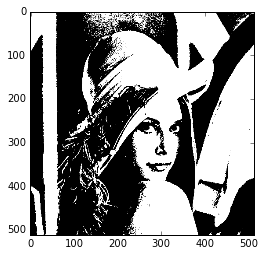

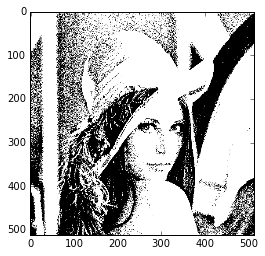

In [17]:
import matplotlib.pyplot as plt
import threshold


img = io.imread("lenna.png")
img_gray = color.rgb2gray(img)


bin_image_fixed = threshold.fixedThresholding(img_gray, 120/255)
plt.figure(1)
plt.imshow(bin_image_fixed, cmap='Greys_r')

bin_image_random = threshold.randomThresholding(img_gray, 0.3)
plt.figure(2)
plt.imshow(bin_image_random, cmap='Greys_r')

## Seuillage ordonné

Pour le seuillage ordonnée, au lieu de se baser sur une simple valeur de seuil, on a à la place une matrice, ici dans l'exemple que l'on récupère des sources Matlab, de dimension 6x6. Cette matrice est ensuite répliquée pour couvrir une matrice équivalente à la taille de l'image source.

La matrice utilisée dépend de la méthode et donc du résultat désirés.

In [18]:
def filtre(m,taille):
    result = numpy.zeros(taille)
    for i in range(taille[0]) :
        for j in range(taille[1]) :
            result[i][j] = m[i%m.shape[0]][j%m.shape[1]]
    return result

def quantification(img,m):
    return img*m.size

def ceuillage(imgQ, filtre):
    result = numpy.zeros(imgQ.shape)
    for i in range(imgQ.shape[0]) :
        for j in range(imgQ.shape[1]) :
            if (imgQ[i][j] <= filtre[i][j]) :
                result[i][j] = 0
            else :
                result[i][j] = 1
    return result

def orderedThreshold(img,m):
    #on charge l'image et on la transforme en niveau de gris
    img = io.imread(img)
    img_gray = color.rgb2gray(img)
    
    #on crée le filtre
    fil = filtre(m,img_gray.shape)
    
    #on quantifie les niveux de gris de l'image et on effectue le ceuillage
    imgQ = quantification(img_gray,m)
    result = ceuillage(imgQ,fil)
    
    return result


### Points en cluster

(<matplotlib.figure.Figure at 0xb516d37b8>,
 <matplotlib.image.AxesImage at 0xb52733eb8>)

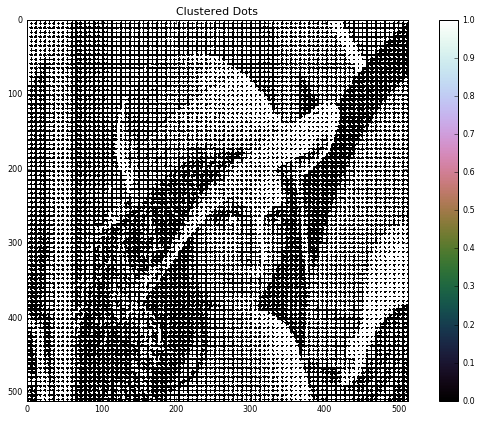

In [19]:
#Ordered threshold - Clustered dots
s1 = numpy.array([[34, 25, 21, 17, 29, 33],
                  [30, 13, 9 , 5 , 12, 24],
                  [18, 6 , 1 , 0 , 8 , 20],
                  [22, 10, 2 , 3 , 4 , 16],
                  [26, 14, 7 , 11, 15, 28],
                  [35, 31, 19, 23, 27, 32]])

#Affichage
result = orderedThreshold("Lenna.png",s1)
external.tifffile.imshow(result,title="Clustered Dots")

### Point blanc central

(<matplotlib.figure.Figure at 0xb528a0390>,
 <matplotlib.image.AxesImage at 0xb5139c550>)

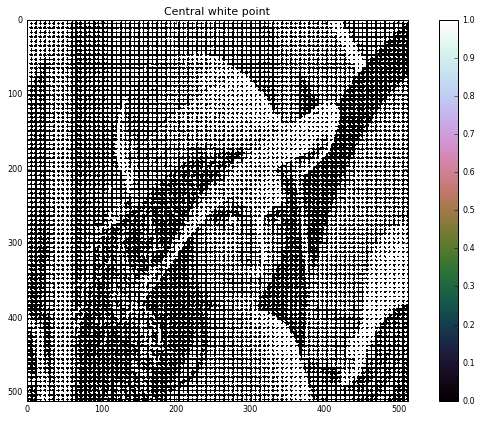

In [20]:
#Ordered matrix with central white point
s2 = numpy.array([[34, 25, 21, 17, 29, 33],
                  [30, 13, 9 , 5 , 12, 24],
                  [18, 6 , 1 , 0 , 8 , 20],
                  [22, 10, 2 , 3 , 4 , 16],
                  [26, 14, 7 , 11, 15, 28],
                  [35, 31, 19, 23, 27, 32]])

#Affichage
result = orderedThreshold("Lenna.png",s2)
external.tifffile.imshow(result,title="Central white point")

### Point centré équilibré

(<matplotlib.figure.Figure at 0xb526e51d0>,
 <matplotlib.image.AxesImage at 0xb525d3470>)

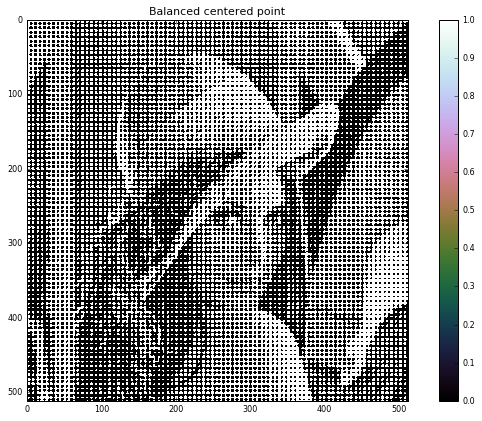

In [21]:
#Ordered matrix with balanced centered point
s3 = numpy.array([[30, 22, 16, 21, 33, 35],
		       [24, 11, 7 , 9 , 26, 28],
		       [13, 5 , 0 , 2 , 14, 19],
		       [15, 3 , 1 , 4 , 12, 18],
		       [27, 8 , 6 , 10, 25, 29],
		       [32, 20, 17, 23, 31, 34]])  

#Affichage
result = orderedThreshold("Lenna.png",s3)
external.tifffile.imshow(result,title="Balanced centered point")

### Matrice ordonnée diagonalement avec points centrés équilibrés

### Points dispersés (Bayer)

## Diffusion d'erreur